# Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.experimental import (
    enable_iterative_imputer,
)
from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.ensemble import (
    RandomForestClassifier,
)
from yellowbrick.model_selection import (
    ValidationCurve,
)

# url = (
#     "http://biostat.mc.vanderbilt.edu/"
#     "wiki/pub/Main/DataSets/titanic3.xls"
# )
df = pd.read_excel("titanic3.xls")
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()

    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)


X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [2]:
ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [3]:
from sklearn.cluster import KMeans
X_std = preprocessing.StandardScaler().fit_transform(
    X
)
km = KMeans(2, random_state=42)
km.fit(X_std)

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [4]:
X_km = km.predict(X)
X_km

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

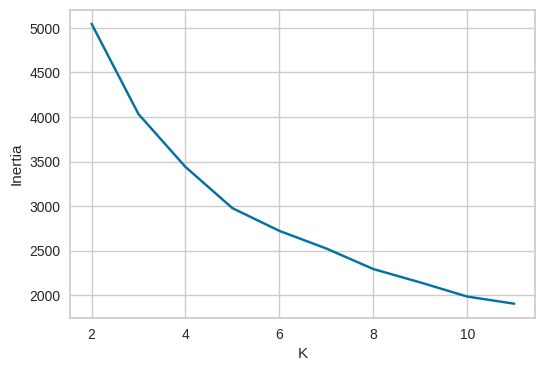

In [5]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia");
#fig.savefig("images/mlpr_1801.png", dpi=300)

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

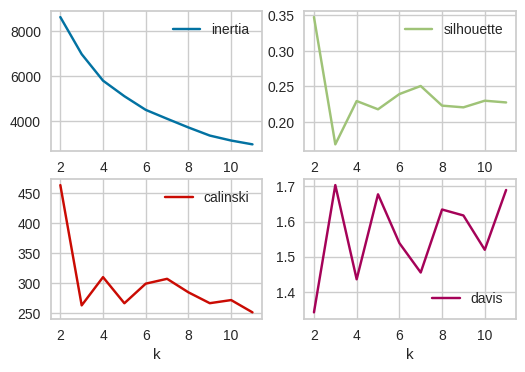

In [6]:
from sklearn import metrics
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(X, k2.labels_)
    )
    chs.append(
        metrics.calinski_harabasz_score(
            X, k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            X, k2.labels_
        )
    )
fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
);
#fig.savefig("images/mlpr_1802.png", dpi=300)

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

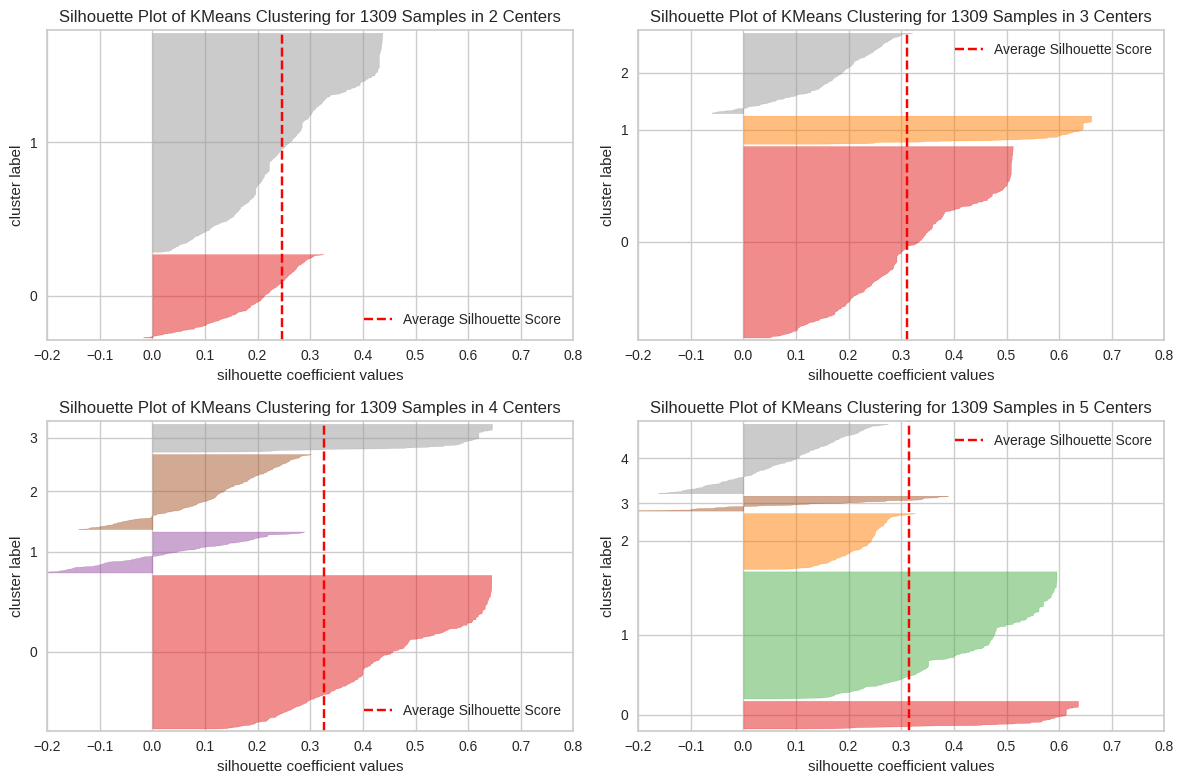

In [7]:
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)
for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(X_std)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()
#fig.savefig("images/mlpr_1803.png", dpi=300)

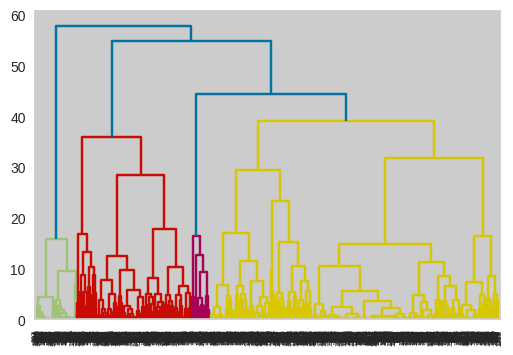

In [8]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward")
)
#fig.savefig("images/mlpr_1804.png", dpi=300)

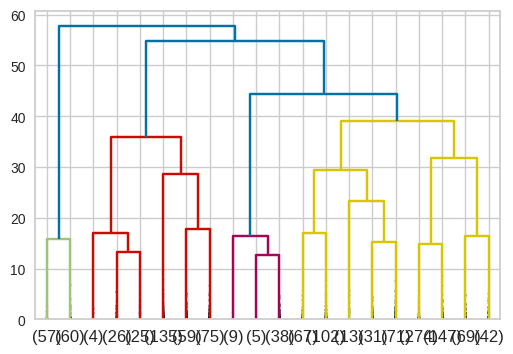

In [9]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)
#fig.savefig("images/mlpr_1805.png", dpi=300)

In [10]:
from sklearn.cluster import (
    AgglomerativeClustering,
)
ag = AgglomerativeClustering(
    n_clusters=4,
    affinity="euclidean",
    linkage="ward",
)
ag.fit(X)

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [11]:
km = KMeans(n_clusters=2)
km.fit(X_std)
labels = km.predict(X_std)
(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
)

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster                 0         1
pclass     mean  0.527478 -1.420910
           var   0.265532  0.138897
age        mean -0.281925  0.922530
           var   0.651165  1.145415
sibsp      mean -0.009948 -0.108926
           var   1.164827  0.303463
parch      mean  0.387949  0.377410
           var   0.830288  0.539488
fare       mean -0.349293  0.882876
           var   0.056372  2.223786
sex_male   mean  0.678647  0.553719
           var   0.218316  0.247797
embarked_Q mean  0.123679  0.016529
           var   0.108497  0.016301
embarked_S mean  0.741015  0.586777
           var   0.192115  0.243140
survived   mean  0.300211  0.595041
           var   0.210307  0.241633

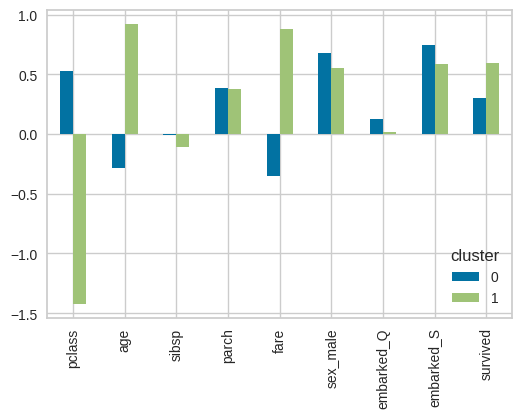

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .mean()
    .T.plot.bar(ax=ax)
);
# fig.savefig(
#     "images/mlpr_1806.png",
#     dpi=300,
#     bbox_inches="tight",
# )

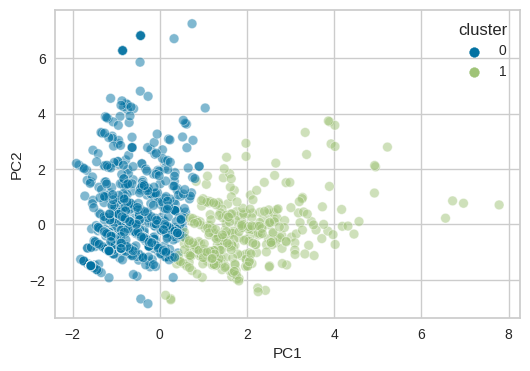

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    StandardScaler,
)

fig, ax = plt.subplots(figsize=(6, 4))
pca = PCA(random_state=42)
X_pca = pca.fit_transform(
    StandardScaler().fit_transform(X)
)
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=X.assign(
        PC1=X_pca[:, 0],
        PC2=X_pca[:, 1],
        cluster=labels,
    ),
    hue="cluster",
    alpha=0.5,
    ax=ax,
);
# fig.savefig(
#     "images/mlpr_1807.png",
#     dpi=300,
#     bbox_inches="tight",
# )

In [14]:
(
    X.assign(cluster=labels)
    .groupby("cluster")
    .age.describe()
    .T
)

cluster,0,1
count,946.000000,363.000000
mean,-0.281925,0.922530
std,0.806948,1.070241
min,-2.221251,-2.162722
25%,-0.628414,0.184938
50%,-0.175242,0.809247
75%,0.106899,1.667672
max,3.540599,4.008830


In [15]:
dt = tree.DecisionTreeClassifier()
dt.fit(X, labels)
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda col_val: col_val[1],
    reverse=True,
):
    print(f"{col:10}{val:10.3f}")

pclass         0.902
age            0.077
sex_male       0.013
embarked_S     0.003
fare           0.003
parch          0.003
sibsp          0.000
embarked_Q     0.000


In [16]:
# from io import StringIO
# import pydotplus
# dot_data = StringIO()
# tree.export_graphviz(
#     dt,
#     out_file=dot_data,
#     feature_names=X.columns,
#     class_names=["0", "1"],
#     max_depth=2,
#     filled=True,
# )
# g = pydotplus.graph_from_dot_data(
#     dot_data.getvalue()
# )
# #g.write_png("images/mlpr_1808.png")